In [0]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier

Importing the data file using read_csv with seperator as space and no headers and checking for the missing values

In [91]:
df = (pd.read_csv("australian.dat", sep='\s+', header=None))
print(df.isna().sum())

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
dtype: int64


Printing the Top five rows of the data to analyse the data

In [92]:
print(df.head(5))
x = df.iloc[:,:14]
y= df.iloc[:,14:15]
x = (x - x.min())/(x.max() - x.min())

pd.set_option('display.max_columns', 15)
print(x.describe())

   0      1      2   3   4   5      6   7   8   9   10  11   12    13  14
0   1  22.08  11.46   2   4   4  1.585   0   0   0   1   2  100  1213   0
1   0  22.67   7.00   2   8   4  0.165   0   0   0   0   2  160     1   0
2   0  29.58   1.75   1   4   4  1.250   0   0   0   1   2  280     1   0
3   0  21.67  11.50   1   5   3  0.000   1   1  11   1   2    0     1   1
4   1  20.17   8.17   2   6   4  1.960   1   1  14   0   2   60   159   1
               0           1           2           3           4           5   \
count  690.000000  690.000000  690.000000  690.000000  690.000000  690.000000   
mean     0.678261    0.267943    0.169954    0.383333    0.490190    0.461594   
std      0.467482    0.178245    0.177792    0.215031    0.283328    0.249040   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.134135    0.035714    0.500000    0.230769    0.375000   
50%      1.000000    0.223684    0.098214    0.500000    0.538462    0

Check for the outlier in the data with respect to each column and the target variable

In [93]:
df = pd.concat([x,y],axis=1)
z = np.abs(stats.zscore(df))
df = df[(z < 3).all(axis=1)]
X = df.iloc[:,:14]
y= df.iloc[:,14:15]
print(x.head(5)) 

    0         1         2    3         4      5         6    7    8   \
0  1.0  0.125263  0.409286  0.5  0.230769  0.375  0.055614  0.0  0.0   
1  0.0  0.134135  0.250000  0.5  0.538462  0.375  0.005789  0.0  0.0   
2  0.0  0.238045  0.062500  0.0  0.230769  0.375  0.043860  0.0  0.0   
3  0.0  0.119098  0.410714  0.0  0.307692  0.250  0.000000  1.0  1.0   
4  1.0  0.096541  0.291786  0.5  0.384615  0.375  0.068772  1.0  1.0   

         9    10   11    12       13  
0  0.000000  1.0  0.5  0.05  0.01212  
1  0.000000  0.0  0.5  0.08  0.00000  
2  0.000000  1.0  0.5  0.14  0.00000  
3  0.164179  1.0  0.5  0.00  0.00000  
4  0.208955  0.0  0.5  0.03  0.00158  


Geneating the heatMap tocheck the correlation 

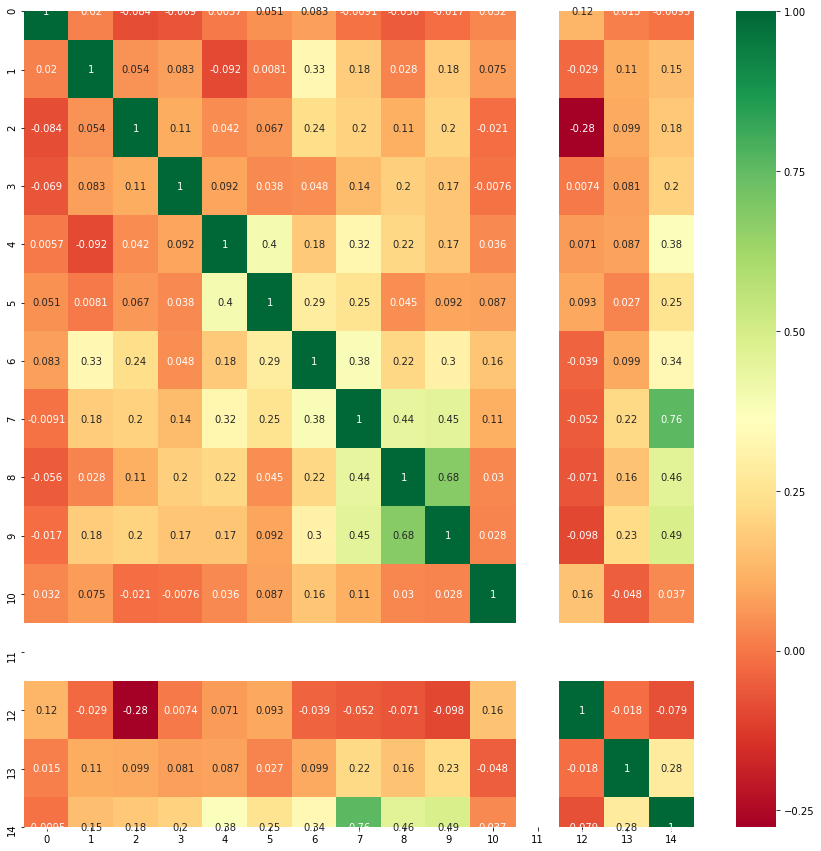

In [94]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,15))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

Splitting the Data into training and Test set

In [0]:
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size=0.25, random_state=42)

KNN Model to classify 

In [96]:
for i in range(10,100,30):
  knn = KNeighborsClassifier(n_neighbors=i,weights='distance')
  knn.fit(X_train, y_train.values.ravel())
  print(knn.score(X_test, y_test))

0.8344827586206897
0.8275862068965517
0.8551724137931035
